In [71]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
advert= pd.read_csv(r"C:\Users\Esther\Desktop\Thoko CodSoft Internship\advertising.csv")
advert

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [73]:
advert.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [74]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [75]:
advert.dtypes 

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [76]:
advert.isnull().values.any()

False

In [77]:
advert.duplicated().any()

False

In [78]:
advert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


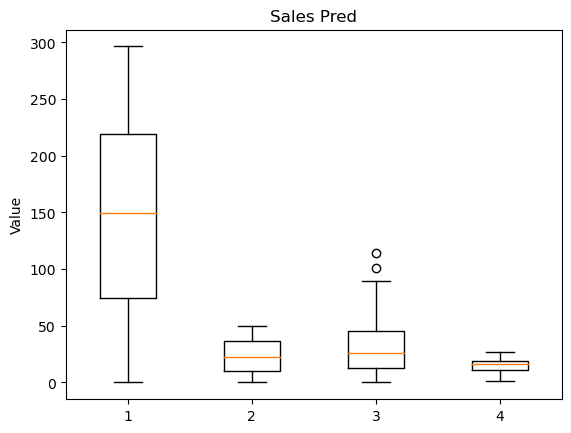

Mean: 53.99775
Standard Deviation: TV           85.639332
Radio        14.809646
Newspaper    21.724106
Sales         5.270666
dtype: float64
25th Percentile: 13.05
75th Percentile: 50.425


In [79]:
mean = np.mean(advert)
std_dev = np.std(advert)

q1, q3 = np.percentile(advert, [25, 75])

plt.boxplot(advert)
plt.title('Sales Pred')
plt.ylabel('Value')
plt.show()

print('Mean:', mean)
print('Standard Deviation:', std_dev)
print('25th Percentile:', q1)
print('75th Percentile:', q3)

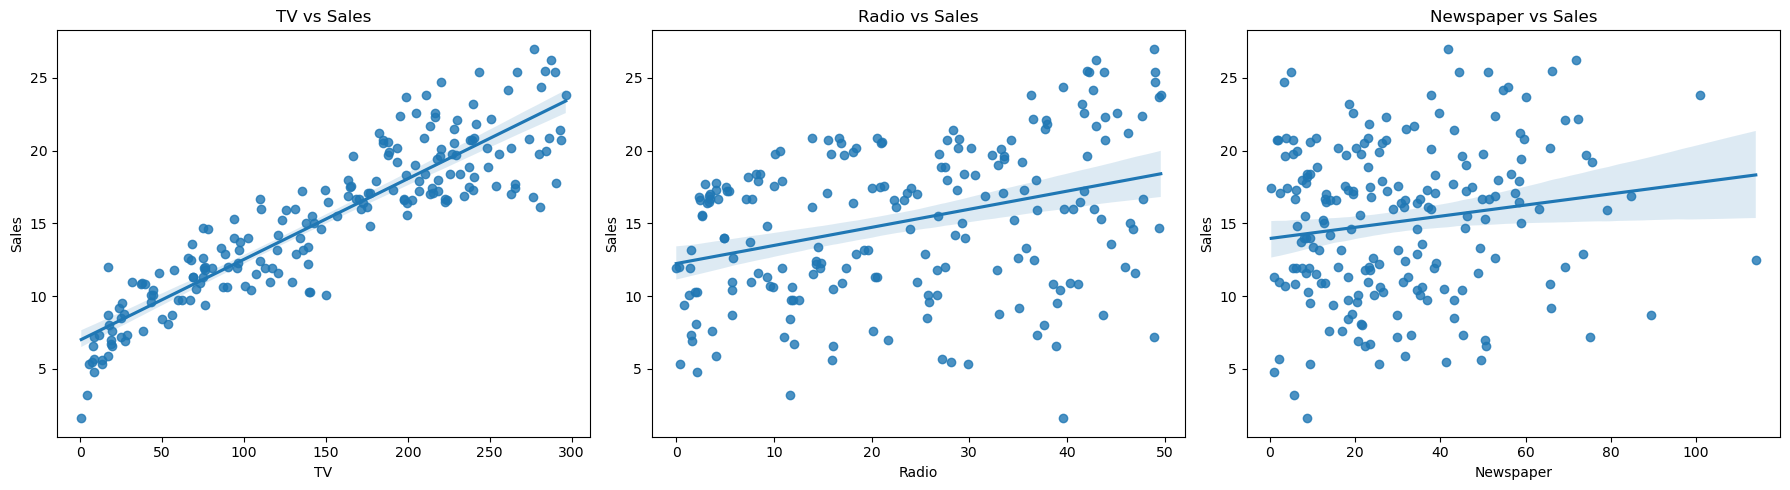

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.regplot(x='TV', y='Sales', data=advert, ax=axes[0])
axes[0].set_title('TV vs Sales')

sns.regplot(x='Radio', y='Sales', data=advert, ax=axes[1])
axes[1].set_title('Radio vs Sales')

sns.regplot(x='Newspaper', y='Sales', data=advert, ax=axes[2])
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

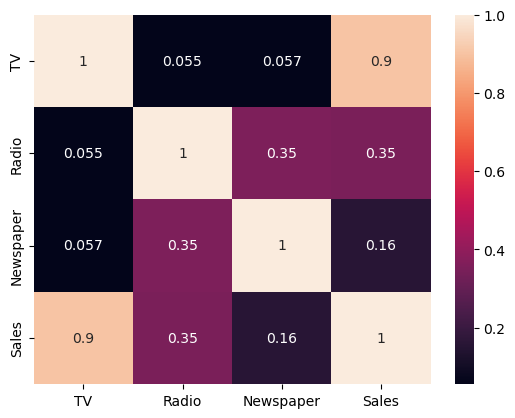

In [81]:
sns.heatmap(advert.corr(), annot=True)
plt.show()

In [82]:
x = advert.drop(columns=['Sales'])
y = advert['Sales']

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [84]:
print(x_train)

        TV  Radio  Newspaper
79   116.0    7.7       23.1
197  177.0    9.3        6.4
38    43.1   26.7       35.1
24    62.3   12.6       18.3
122  224.0    2.4       15.6
..     ...    ...        ...
106   25.0   11.0       29.7
14   204.1   32.9       46.0
92   217.7   33.5       59.0
179  165.6   10.0       17.6
102  280.2   10.1       21.4

[160 rows x 3 columns]


In [85]:
print(y_train)

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64


In [87]:
model = LinearRegression()

In [88]:
model.fit(x_train, y_train)

LinearRegression()

In [89]:
sales_pred = model.predict(x_test)
print(sales_pred)

[17.0347724  20.40974033 23.72398873  9.27278518 21.68271879 12.56940161
 21.08119452  8.69035045 17.23701254 16.66657475  8.92396497  8.4817344
 18.2075123   8.06750728 12.64550975 14.93162809  8.12814594 17.89876565
 11.00880637 20.47832788 20.80631846 12.59883297 10.9051829  22.38854775
  9.41796094  7.92506736 20.83908497 13.81520938 10.77080925  7.92682509
 15.95947357 10.63490851 20.80292008 10.43434164 21.5784752  21.18364487
 12.12821771 22.80953262 12.60992766  6.46441252]


In [90]:
mse = mean_squared_error(y_test, sales_pred)
print(mse)

2.907756910271091


In [91]:
R_squared = r2_score(y_test, sales_pred)
print(R_squared) 

0.9059011844150826


In [92]:
sales_pred = model.predict(x_test)
R_squared = r2_score(y_test, sales_pred)
print(R_squared)

0.9059011844150826
